# Visualize responses to convnets fit on structured, natural movie stimuli

In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
from os.path import expanduser
import os
import json
import theano
import tableprint
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# deep retina imports
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from deepretina.modeltools import load_model, load_partial_model, list_layers, get_performance, get_weights, get_test_responses
from deepretina.metrics import *


%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)
/home/lane/ssd/code/theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


# Load model

In [6]:
structured_dir = expanduser('~/data/deep-retina/saved/lane-desktop.lane/2016-01-27 16.10.31 convnet/')
naturalmovie_dir = expanduser('~/data/deep-retina/saved/lane-desktop.lane/2016-01-27 16.38.03 convnet/')
whitenoise_dir = expanduser('~/data/deep-retina/saved/lane-desktop.lane/2016-01-27 17.05.37 convnet/')
naturalscene_dir = expanduser('~/data/deep-retina/saved/lane-desktop.lane/2016-01-27 17.33.18 convnet/')
weight_name = 'epoch008_iter00300_weights.h5' # same for all models because I only did 10 epochs

In [7]:
structured_mdl = load_model(structured_dir, weight_name)
naturalmovie_mdl = load_model(naturalmovie_dir, weight_name)
whitenoise_mdl = load_model(whitenoise_dir, weight_name)
naturalscene_mdl = load_model(naturalscene_dir, weight_name)

In [9]:
exptdate = '16-01-08'
cells = [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13]
mdls = [structured_mdl, naturalmovie_mdl, whitenoise_mdl, naturalscene_mdl]
predicted_whites = []
predicted_naturalscenes = []
predicted_structureds = []
predicted_naturalmovies = []
for mdl in mdls:
    true_white, predicted_white = get_test_responses(mdl, stim_type='whitenoise', cells=cells, exptdate=exptdate)
    true_natural, predicted_natural = get_test_responses(mdl, stim_type='naturalscene', cells=cells, exptdate=exptdate)
    true_struct, predicted_struct = get_test_responses(mdl, stim_type='structured', cells=cells, exptdate=exptdate)
    true_movie, predicted_movie = get_test_responses(mdl, stim_type='naturalmovie', cells=cells, exptdate=exptdate)
    
    predicted_whites.append(predicted_white)
    predicted_naturalscenes.append(predicted_natural)
    predicted_structureds.append(predicted_struct)
    predicted_naturalmovies.append(predicted_movie)

Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.


In [10]:
cc_multi = multicell(cc)
lli_multi = multicell(lli)
rmse_multi = multicell(rmse)
fev_multi = multicell(fev)

# whitenoise on all cells is crap

In [11]:
average_cc_white, all_ccs_white = cc_multi(true_white, predicted_whites[2])
print(average_cc_white)
print(all_ccs_white)

0.0584824416369
[0.079363917813582915, -0.012928351177866183, 0.044598268482701028, 0.14710062263198528, 0.032422607024695432, 0.040093808434875935, 0.10759726711601499, 0.11072652109267593, -0.0081921582196213313, 0.098386649210248492, 0.040317247911782129, 0.022302899321505618]


# structured stimuli performance

In [16]:
average_cc_struct, all_ccs_struct = cc_multi(true_struct, predicted_structureds[0])
print(average_cc_struct)
print(all_ccs_struct)

0.381508634933
[0.63262296657295558, 0.15918405757853923, 0.52951843507398955, 0.60738970859663455, 0.13166612311470413, 0.11782629891866413, 0.37968696885452774, 0.63839928244343347, 0.096425677257783365, 0.4628890538747118, 0.47374940805253302, 0.34874563885444398]


In [18]:
true_struct.shape

(5950, 12)

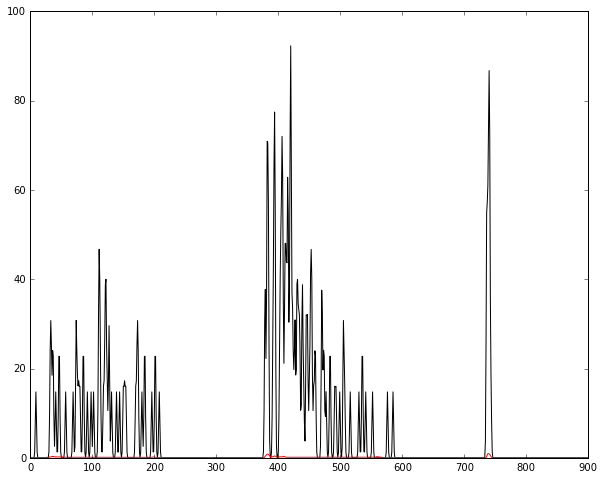

In [24]:
plt.plot(true_struct[:,0][-900:], 'k')
plt.plot(predicted_structureds[0][-900:, 0], 'r')

# natural movies

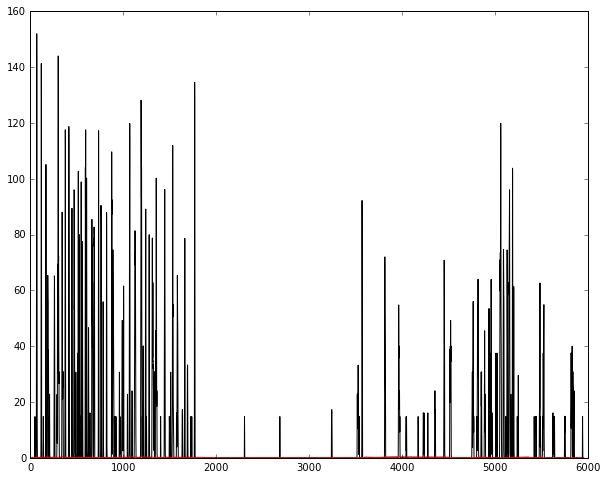

In [26]:
plt.plot(true_movie[:,0], 'k')
plt.plot(predicted_naturalmovies[1][:,0], 'r')